In [1]:
#------------------------------------------OLS LINEAR REGRESSION BY BADAR WIRYAWAN-----------------------------------------------

import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_white
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#------------------------------------------OLS LINEAR REGRESSION BY BADAR WIRYAWAN-----------------------------------------------

file_path = input("Masukkan Lokasi File (Klik Kanan > Copy as path): ")
sheet = input("Masukkan Nama Sheet (Untuk File Excel .xlsx): ")
independent_var = input("Masukkan Variabel Independen (var1, var2, var3): ")
dependent_var = input("Masukkan Variabel Dependen: ")

#-------CONTOH INPUT----------
#file_path = "D:\Programming\\advertising.csv" #Sumber: https://www.kaggle.com/datasets/mehmetisik/advertisingcsv/data
#sheet = "Sheet1" #---> Untuk nama Sheet Excel (.xlsx).
#independent_var = "TV, radio, newspaper"
#dependent_var = "sales"
#-------OUTPUT DI BAWAH PANEL CODE ADALAH HASIL DARI INPUT DI ATAS-------

#data = pd.read_csv(file_path) #---> Untuk file CSV.
data = pd.read_excel(io=file_path, sheet_name=sheet) #---> Untuk file Excel (.xlsx).



UJI BEST LINEAR UNBIASED ESTIMATOR (BLUE)

1. Normality
   
   Residual berdistribusi normal jika Asymp. Sig. 2-tailed > 0.050.

2. Multicollinearity
   
   Variabel tidak berkorelasi satu sama lain jika VIF < 10 dan Tolerance > 0.10.

3. Heteroskedasticity
   
   Residual homoskedastis jika Prob. Chi-Square > 0.050.
   
4. Autocorrelation
   
   Residual tidak berkorelasi satu sama lain jika DW berada dalam range (dU, 4 - dU).

RUN KODE DI BAWAH UNTUK UJI BLUE.

In [22]:
#------------------------------------------OLS LINEAR REGRESSION BY BADAR WIRYAWAN-----------------------------------------------

add_constant = sm.add_constant(data)
independent_list = independent_var.split(", ")
new_independent = independent_list.insert(0, "const")
dependent_list = []
dependent_list.append(dependent_var)

equation = sm.OLS(endog=add_constant[dependent_list], exog=add_constant[independent_list])
model_fit = equation.fit()

#------------------------------------------OLS LINEAR REGRESSION BY BADAR WIRYAWAN-----------------------------------------------

def normality_test():
    residuals = model_fit.resid
    
    ks_test, p_value = stats.ks_1samp(residuals, stats.norm.cdf, args=(np.mean(residuals), np.std(residuals, ddof=1)))

    print("----------------------------------------")
    print(" ")
    print(" " * 8 + "NORMALITY TEST")
    print(" ")
    print("Test Statistics" + " " * 8 + f": {ks_test:.4f}")
    print("Asymp. Sig. 2-tailed" + " " * 3 + f": {p_value:.4f}")
    print(" ")

def multicollinearity_test():
    multicollinearity = pd.DataFrame()
    multicollinearity["Variable"] = independent_list
    multicollinearity["VIF"] = [variance_inflation_factor(add_constant[independent_list].values, a) for a in range(len(independent_list))]
    multicollinearity["Tolerance"] = 1 / multicollinearity["VIF"]

    print("----------------------------------------")
    print(" ")
    print(" " * 8 + "MULTICOLLINEARITY TEST")
    print(" ")
    print(multicollinearity.drop(index=0))
    print(" ")

def heteroskedasticity_test():
    residuals = model_fit.resid

    white_test = het_white(resid=residuals, exog=add_constant[independent_list])

    print("----------------------------------------")
    print(" ")
    print(" " * 8 + "HETEROSKEDASTICITY TEST")
    print(" ")
    print("White Test Statistics" + " " * 2 + f": {white_test[0]:.4f}")
    print("Prob. Chi-Square" + " " * 7 + f": {white_test[1]:.4f}")
    print(" ")

def autocorrelation_test():
    residuals = model_fit.resid

    durbinwatson = sm.stats.durbin_watson(residuals)

    print("----------------------------------------")
    print(" ")
    print(" " * 8 + "AUTOCORRELATION TEST")
    print(" ")
    print("Durbin-Watson Statistics" + " " * 2 + f": {round(durbinwatson, 4)}")
    print("Independent Variables" + " " * 5 + f": {len(independent_list)-1}")
    print("Dependent Variable" + " " * 8 + f": {len(dependent_list)}")
    print(" ")
    print("----------------------------------------")
    
normality_test()
multicollinearity_test()
heteroskedasticity_test()
autocorrelation_test()

----------------------------------------
 
        NORMALITY TEST
 
Test Statistics        : 0.1320
Asymp. Sig. 2-tailed   : 0.0017
 
----------------------------------------
 
        MULTICOLLINEARITY TEST
 
    Variable       VIF  Tolerance
1         TV  1.004611   0.995410
2      radio  1.144952   0.873399
3  newspaper  1.145187   0.873220
 
----------------------------------------
 
        HETEROSKEDASTICITY TEST
 
White Test Statistics  : 67.5352
Prob. Chi-Square       : 0.0000
 
----------------------------------------
 
        AUTOCORRELATION TEST
 
Durbin-Watson Statistics  : 2.0836
Independent Variables     : 3
Dependent Variable        : 1
 
----------------------------------------


VISUALISASI BEST LINEAR UNBIASED ESTIMATOR (BLUE)

Tiga dari empat uji BLUE di atas dapat ditelaah melalui visual.

1. Normality

    Residual normal jika titik-titik dalam probability plot konsisten mengikuti garis diagonal.

2. Multicollinearity

    Variabel independen tidak berkorelasi satu sama lain jika nilai koefisien Pearson kurang dari 0,8.

3. Heteroskedasticity

    Residual homoskedastis jika sebaran titik-titik pada plot (ZPRED, SRESID) tidak cenderung memusat, dan titik-titik dalam (Dependen, ZPRED) menyebar rata secara diagonal.

SETELAH MELIHAT UJI BLUE DI ATAS, RUN KODE DI BAWAH UNTUK MELIHAT VISUALISASI.

------------------------------------------------------------------------------
                       Normality Test Visualization


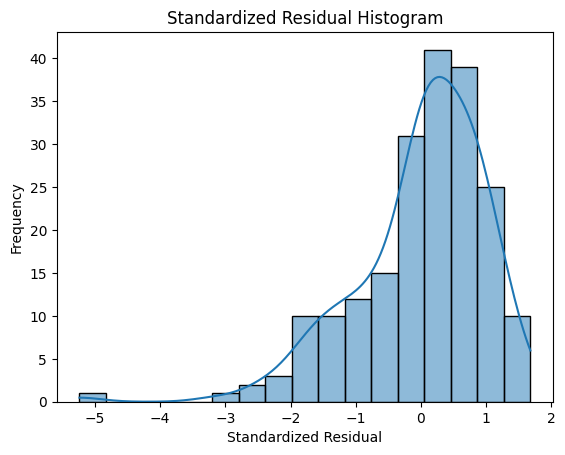

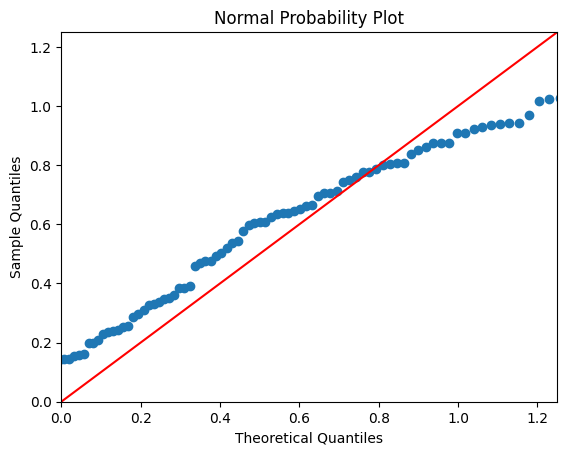

------------------------------------------------------------------------------
                    Multicollinearity Test Visualization


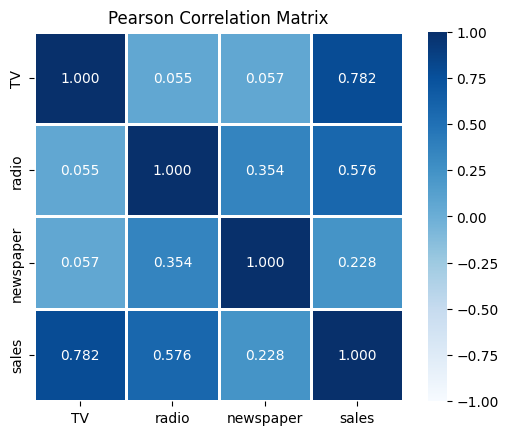

------------------------------------------------------------------------------
                    Heteroskedasticity Test Visualization


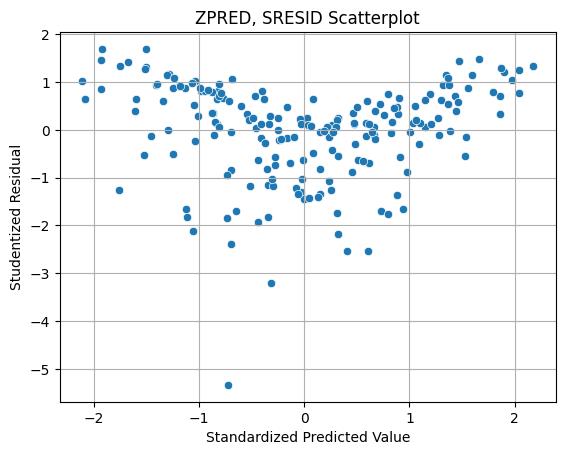

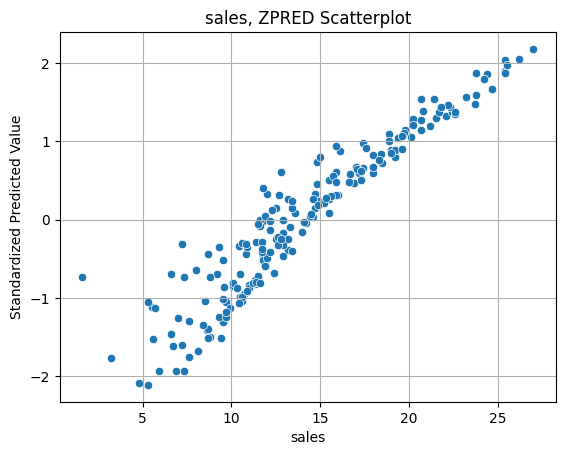

------------------------------------------------------------------------------


In [23]:
#------------------------------------------OLS LINEAR REGRESSION BY BADAR WIRYAWAN-----------------------------------------------

class normality_visual:
    
    def normal_pplot():
        residual = model_fit.resid
        zresid = residual / np.sqrt(model_fit.scale)
        sm.qqplot(zresid, line="45")
        plt.title("Normal Probability Plot")
        plt.xlim(0, 1.25)
        plt.ylim(0, 1.25)
        plt.show()
    
    def normal_histogram():
        residual = model_fit.resid
        zresid = residual / np.sqrt(model_fit.scale)
        sns.histplot(zresid, kde=True)
        plt.title("Standardized Residual Histogram")
        plt.xlabel("Standardized Residual")
        plt.ylabel("Frequency")
        plt.show()

class multicollinearity_visual():

    def pearson_corr():
        var_list = []
        independent_list01 = independent_var.split(", ")

        for a in range(len(independent_list01)):
            var_list.append(independent_list01[a])

        var_list.append(dependent_var)


        sns.heatmap(data[var_list].corr(method="pearson"), cmap="Blues", vmax= 1, vmin = -1, fmt= ".3f", linewidths= 2, square= True, annot=True)
        plt.title("Pearson Correlation Matrix")
        plt.show()

class heteroskedasticity_visual:
    
    def zpred_sresid():
        studentized = model_fit.get_influence().resid_studentized_internal
        pred_value = model_fit.fittedvalues
        zpred = (pred_value - pred_value.mean()) / pred_value.std()

        sns.scatterplot(add_constant, x=zpred, y=studentized)
        plt.grid(True)
        plt.title("ZPRED, SRESID Scatterplot")
        plt.xlabel("Standardized Predicted Value")
        plt.ylabel("Studentized Residual")
        plt.show()
    
    def dependent_zpred():
        dependent = dependent_list[0]
        pred_value = model_fit.fittedvalues
        zpred = (pred_value - pred_value.mean()) / pred_value.std()

        sns.scatterplot(add_constant, x=dependent, y=zpred)
        plt.grid(True)
        plt.title(f"{dependent}, ZPRED Scatterplot")
        plt.xlabel(f"{dependent}")
        plt.ylabel("Standardized Predicted Value")
        plt.show()

print("------------------------------------------------------------------------------")
print(" " * 23 + "Normality Test Visualization")
normality_visual.normal_histogram()
normality_visual.normal_pplot()
print("------------------------------------------------------------------------------")
print(" " * 20 + "Multicollinearity Test Visualization")
multicollinearity_visual.pearson_corr()
print("------------------------------------------------------------------------------")
print(" " * 20 + "Heteroskedasticity Test Visualization")
heteroskedasticity_visual.zpred_sresid()
heteroskedasticity_visual.dependent_zpred()
print("------------------------------------------------------------------------------")

STATISTIK DESKRIPTIF

Analisis statistik deskriptif adalah analisis kuantitatif untuk menyajikan gambaran data baik persebaran maupun pemusatan.

RUN KODE DI BAWAH UNTUK MELIHAT DESKRIPSI DATA.

In [ ]:
#------------------------------------------OLS LINEAR REGRESSION BY BADAR WIRYAWAN-----------------------------------------------

var_list = []
independent_list01 = independent_var.split(", ")

for a in range(len(independent_list01)):
    var_list.append(independent_list01[a])

var_list.append(dependent_var)

data[var_list].describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


Jika lolos uji BLUE, maka hasil regresi sah untuk diinterpretasikan.

RUN KODE DI BAWAH UNTUK MELIHAT MODEL FIT (PERSAMAAN REGRESI LINEAR).

In [25]:
#------------------------------------------OLS LINEAR REGRESSION BY BADAR WIRYAWAN-----------------------------------------------

def model_fit():
    
    normalized_data = {}

    for a in range(len(var_list)):
        normalized_data_list = (data[var_list[a]] - data[var_list[a]].min()) / (data[var_list[a]].max() - data[var_list[a]].min())
        normalized_data.update({f"{var_list[a]}": normalized_data_list})

    normalized_df = pd.DataFrame(normalized_data)

    new_data = sm.add_constant(normalized_df)

    reg = sm.OLS(exog=new_data[independent_list], endog=new_data[dependent_list])
    reg_fit = reg.fit()

    print(reg_fit.summary())

model_fit()

#------------------------------------------OLS LINEAR REGRESSION BY BADAR WIRYAWAN-----------------------------------------------

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 22 Nov 2024   Prob (F-statistic):           1.58e-96
Time:                        19:19:29   Log-Likelihood:                 260.77
No. Observations:                 200   AIC:                            -513.5
Df Residuals:                     196   BIC:                            -500.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0540      0.012      4.411      0.0